In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
# initialize all the parameters
b1 = 0.7
b2 = 0.7
alfa1 = 1
alfa2 = 1
alfa3 = 1
sigma = 1
Nspin = 300
Niter = 10000000
dt = 0.05 #per fare ordine N^3 (quasi): Niter = 50000000, dt = 0.5
print(2**(1/2))

1.4142135623730951


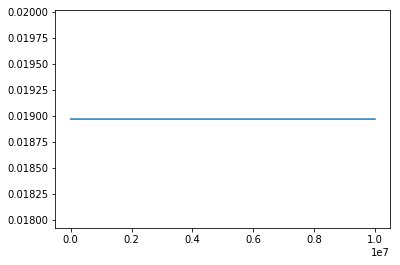

In [8]:
X = np.random.normal(0,1,Nspin)  #the vector of diffusions

MediaX = np.repeat(np.mean(X),Niter)  #initialize the average of the diffusions

eps = 0  #if you want to put a bias in the initial distribution 

x1 = np.repeat(0,Niter) #this will store the first diffusion

m = -1 + 2*np.random.random_sample(Nspin) #initialize the magnetizations vector

m1 = np.repeat(m[0],Niter) #these will store 
m2 = np.repeat(m[1],Niter) #the first two magnetizations

M = np.repeat(np.mean(m),Niter)  #initialize the average of the magnetizations

plt.plot(M)
plt.show() # just to try

In [ ]:
for i in range(0,Niter):
        M[i] = np.mean(m)  #update the running values
        m1[i] = m[0]
        m2[i] = m[1]
        MediaX[i] = np.mean(X)
        x1[i] = X[0]
        u1 = np.random.random_sample(Nspin) # draw N uniform samples to check the update rule 
        u2 = np.random.random_sample(Nspin)
        noise = np.random.normal(0,1,Nspin) # draw the updated noise vector 
        w1 = Nspin*(1 + m)/2*np.exp(-b1*m - b2*M[i] - b1*X-b2*MediaX[i])*dt > u1  #accept the update rules with the right proba
        w2 = Nspin*(1 - m)/2*np.exp(b1*m + b2*M[i] + b1*X+ b2*MediaX[i])*dt > u2
        X = X - (alfa2/Nspin)*(X - MediaX[i])*dt + sigma/(Nspin**(1/2))*noise*(dt**(1/2)) - (alfa3/Nspin**2)*MediaX[i]*dt
        m =  m - w1*(2/Nspin) + w2*(2/Nspin)                                               

In [ ]:
plt.plot(M)
plt.xlabel('time')
plt.ylabel('Media2')
plt.show() 

plt.plot(m1)
plt.xlabel('time')
plt.ylabel('media1')
plt.show() 

plt.plot(m2)
plt.xlabel('time')
plt.ylabel('media1_altra')
plt.show() 

plt.plot(MediaX)
plt.xlabel('time')
plt.ylabel('MediaX')
plt.show() 

plt.plot(x1)
plt.xlabel('time')
plt.ylabel('prima diffusione')
plt.show() 
